In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows' , 100)

In [3]:
df = pd.read_csv('municipality_bus_utilization.csv')
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [4]:
df.tail()

,timestamp,municipality_id,usage,total_capacity
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113
13069,2017-08-19 16:30:35,3,1189,1930


In [5]:
df.shape

(13070, 4)

In [6]:
df['free_to_use'] = df['total_capacity'] - df['usage']
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665
13068,2017-08-19 16:30:35,6,1680,3113,1433


In [7]:
(df['free_to_use'] <= 0).sum()

241

In [8]:
(df['free_to_use'] < 0 ).sum()

229

In [9]:
df[df['free_to_use'] < 0 ]

,timestamp,municipality_id,usage,total_capacity,free_to_use
7618,2017-07-17 12:04:02,1,399,397,-2
7621,2017-07-17 12:31:03,1,401,397,-4
7635,2017-07-17 13:04:03,1,399,397,-2
7648,2017-07-17 13:31:03,1,403,397,-6
7659,2017-07-17 14:04:03,1,403,397,-6
...,...,...,...,...,...
13010,2017-08-19 14:03:31,1,408,397,-11
13026,2017-08-19 14:30:33,1,410,397,-13
13037,2017-08-19 15:03:34,1,408,397,-11
13048,2017-08-19 15:29:33,1,411,397,-14


In [10]:
df['free_to_use'].min()

-15

In [11]:
df[df['free_to_use'] < 0 ]['municipality_id'].value_counts() # All wrong data in same municipality. Or maybe municipality's total_capacity may be wrong. 
                                                             # Maybe everything is right, the municipality needs a bigger capacity

1    229
Name: municipality_id, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
 4   free_to_use      13070 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 510.7+ KB


In [13]:
df = df.sort_values('timestamp' , ascending=True)
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587,385
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665


In [14]:
df['timestamp'].value_counts(dropna=False) # There may be 2 misspelled data

2017-06-04 07:59:42    10
2017-07-22 15:31:37    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
2017-07-23 14:30:43    10
                       ..
2017-08-19 16:30:35    10
2017-06-16 14:34:14     9
2017-08-11 08:25:43     9
2017-06-16 14:27:13     1
2017-08-11 08:19:39     1
Name: timestamp, Length: 1309, dtype: int64

In [15]:
df[df['timestamp'] == '2017-06-16 14:27:13']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2290,2017-06-16 14:27:13,5,189,587,398


In [16]:
df[df['timestamp'] == '2017-06-16 14:34:14']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2299,2017-06-16 14:34:14,8,877,2947,2070
2298,2017-06-16 14:34:14,6,983,3113,2130
2297,2017-06-16 14:34:14,2,549,697,148
2296,2017-06-16 14:34:14,0,497,2813,2316
2294,2017-06-16 14:34:14,1,338,397,59
2293,2017-06-16 14:34:14,7,1294,2019,725
2292,2017-06-16 14:34:14,3,803,1930,1127
2291,2017-06-16 14:34:14,4,1348,3893,2545
2295,2017-06-16 14:34:14,9,754,1332,578


In [17]:
df[df['timestamp'] == '2017-08-11 08:19:39']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11480,2017-08-11 08:19:39,3,313,1930,1617


In [18]:
df[df['timestamp'] == '2017-08-11 08:25:43']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11487,2017-08-11 08:25:43,0,344,2813,2469
11489,2017-08-11 08:25:43,1,132,397,265
11488,2017-08-11 08:25:43,6,808,3113,2305
11486,2017-08-11 08:25:43,2,369,697,328
11484,2017-08-11 08:25:43,9,379,1332,953
11483,2017-08-11 08:25:43,5,11,587,576
11482,2017-08-11 08:25:43,8,450,2947,2497
11481,2017-08-11 08:25:43,4,782,3893,3111
11485,2017-08-11 08:25:43,7,739,2019,1280


In [19]:
# df[df['timestamp'] == '2017-06-16 14:27:13']['timestamp'] = '2017-06-16 14:34:14'

In [20]:
df.loc[df['timestamp'] == '2017-06-16 14:27:13', 'timestamp'] = '2017-06-16 14:34:14'
df.loc[df['timestamp'] == '2017-08-11 08:19:39', 'timestamp'] = '2017-08-11 08:25:43' # Yes, it was a typo and it has been corrected.

In [21]:
df['timestamp'].value_counts(dropna=False)

2017-06-04 07:59:42    10
2017-07-22 15:57:37    10
2017-07-23 16:04:46    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
                       ..
2017-06-30 08:26:02    10
2017-06-30 08:25:53    10
2017-06-30 08:00:03    10
2017-06-30 07:59:55    10
2017-08-19 16:30:35    10
Name: timestamp, Length: 1307, dtype: int64

In [22]:
df['municipality_id'].value_counts(dropna=False)

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [23]:
df['total_capacity'].value_counts(dropna=False)

1332    1307
2947    1307
3893    1307
2813    1307
2019    1307
587     1307
697     1307
397     1307
3113    1307
1930    1307
Name: total_capacity, dtype: int64

In [24]:
df['usage'].value_counts(dropna=False)

411     69
354     62
399     31
410     28
623     27
        ..
3376     1
3318     1
3238     1
2372     1
2542     1
Name: usage, Length: 2346, dtype: int64

In [25]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        13070 non-null  datetime64[ns]
 1   municipality_id  13070 non-null  int64         
 2   usage            13070 non-null  int64         
 3   total_capacity   13070 non-null  int64         
 4   free_to_use      13070 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 612.7 KB


In [29]:
# df.groupby('timestamp').max()[['usage','free_to_use']]

In [30]:
# df.groupby('timestamp')[['usage','free_to_use']].min()

In [29]:
# df['timestamp'].head(50)

In [30]:
# df['timestamp'].tail(50)

In [31]:
# df['timestamp'][0].second

In [31]:
for i in range(df.shape[0]):
    if df['timestamp'][i].minute == 0 :
        print(i)

3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819


In [32]:
df.iloc[3400,:]

timestamp          2017-06-24 16:00:04
municipality_id                      2
usage                              459
total_capacity                     697
free_to_use                        238
Name: 3409, dtype: object

In [34]:
df.iloc[12659,:]

timestamp          2017-08-17 14:00:17
municipality_id                      9
usage                              970
total_capacity                    1332
free_to_use                        362
Name: 12654, dtype: object

In [35]:
df.iloc[13039,:]

timestamp          2017-08-19 15:03:34
municipality_id                      7
usage                             1618
total_capacity                    2019
free_to_use                        401
Name: 13033, dtype: object

In [35]:
# df.iloc[3340:3370,:].head(80)

In [36]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].hour == 7 :
#         print(i)

In [36]:
df['timestamp'][0]

Timestamp('2017-06-04 07:59:42')

In [37]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [39]:
df['hour'].value_counts(sort=True) # Perfect now 

13    1520
9     1490
11    1460
8     1450
14    1450
15    1450
12    1420
10    1410
16    1160
7      260
Name: hour, dtype: int64

In [40]:
df['timestamp'] = df['timestamp'] + pd.Timedelta(minutes=5 , seconds=10)

In [41]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [42]:
df['hour'].value_counts() # Almost perfect now 

10    1460
12    1460
14    1460
15    1460
9     1450
11    1450
13    1450
8     1440
16    1440
Name: hour, dtype: int64

In [43]:
# df[df['hour'] == 7]['municipality_id'].value_counts()

In [44]:
# df[df['hour'] == 7]['timestamp'].tail(60) # All 7. o'clock measurements are near to 8 o'clock.

In [45]:
df

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
13064,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
13065,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
13066,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
13067,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


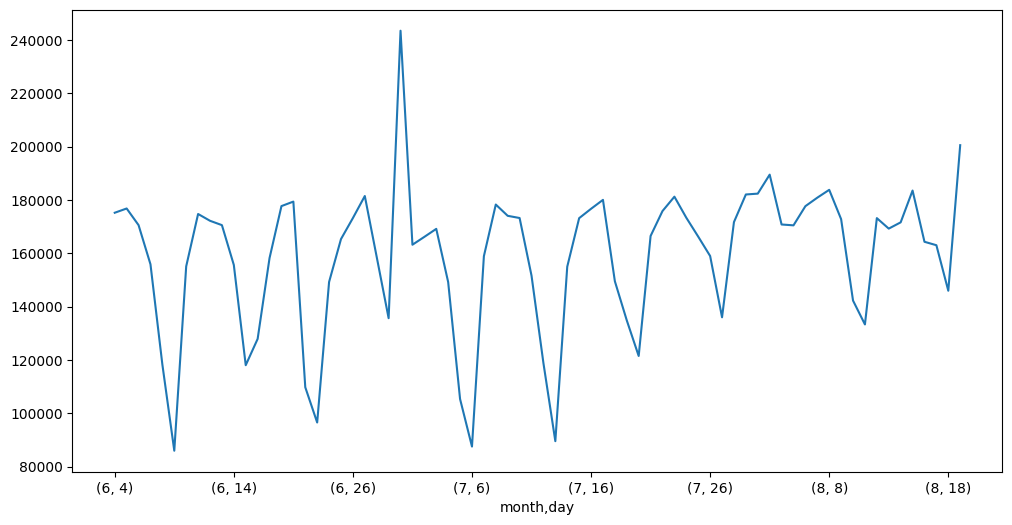

In [46]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].sum().plot();

In [47]:
for x in [6,7,8]:
    for y in range(1,31):
        if df[(df['month'] == x) & (df['day'] == y)]['usage'].sum() == 0 :
            print(f'{x}.Month {y}.day nan')   # We have 18 nan days.

6.Month 1.day nan
6.Month 2.day nan
6.Month 3.day nan
6.Month 20.day nan
6.Month 21.day nan
8.Month 3.day nan
8.Month 4.day nan
8.Month 20.day nan
8.Month 21.day nan
8.Month 22.day nan
8.Month 23.day nan
8.Month 24.day nan
8.Month 25.day nan
8.Month 26.day nan
8.Month 27.day nan
8.Month 28.day nan
8.Month 29.day nan
8.Month 30.day nan


In [48]:
df[(df['month'] == 6) & (df['day'] == 1)]['usage'].sum()

0

In [49]:
df[(df['month'] == 6) & (df['day'] == 30)]['usage'].sum()

243461

In [50]:
df[(df['month'] == 6) & (df['day'] == 30)] # 340 data ???

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
...,...,...,...,...,...,...,...,...,...
4644,2017-06-30 16:31:16,2,475,697,222,6,30,16,31
4642,2017-06-30 16:31:16,6,892,3113,2221,6,30,16,31
4641,2017-06-30 16:31:16,7,986,2019,1033,6,30,16,31
4640,2017-06-30 16:31:16,9,520,1332,812,6,30,16,31


In [51]:
df.groupby(['month','day']).count() # We have 72 days.

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
      9          180              180    180             180          180   
      10         180              180    180             180          180   
      11         180              180    180             180          180   
      12         180              180    180             180          180   
      13         180              180    180             180          180   
      14         180              180    180             180          180   
      15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   
      22         180              180    180             180          180   
      23         180              180    180             180          180   
      24         180              180    180             180          180   
      25         180              180    180             180          180   
      26         180              180    180             180          180   
      27         180              180    180             180          180   
      28         170              170    170             170          170   
      29         180              180    180             180          180   
      30         340              340    340             340          340   
7     1          180              180    180             180          180   
      2          180              180    180             180          180   
      3          180              180    180             180          180   
      4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
      9          180              180    180             180          180   
      10         180              180    180             180          180   
      11         180              180    180             180          180   
      12         180              180    180             180          180   
      13         180              180    180             180          180   
      14         180              180    180             180          180   
      15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         170              170    170             170          170   
      19         180              180    180             180          180   
      20         180              180    180             180          180   
      21         180              180    180             180          180   
      22         180              180    180             180          180   
      23         180              180    180             180          180   
      24         180              180    180             180          180   
      25         170              170    170             170          170   
      2

In [52]:
df.groupby(['month','day']).count()['timestamp'].unique() # All of them should have been 180. Dates with 170 and 340 data should be looked

array([180, 170, 340], dtype=int64)

In [53]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 180] # All day should be 180.

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
      9          180              180    180             180          180   
      10         180              180    180             180          180   
      11         180              180    180             180          180   
      12         180              180    180             180          180   
      13         180              180    180             180          180   
      14         180              180    180             180          180   
      15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   
      22         180              180    180             180          180   
      23         180              180    180             180          180   
      24         180              180    180             180          180   
      25         180              180    180             180          180   
      26         180              180    180             180          180   
      27         180              180    180             180          180   
      29         180              180    180             180          180   
7     1          180              180    180             180          180   
      2          180              180    180             180          180   
      3          180              180    180             180          180   
      4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
      9          180              180    180             180          180   
      10         180              180    180             180          180   
      11         180              180    180             180          180   
      12         180              180    180             180          180   
      13         180              180    180             180          180   
      14         180              180    180             180          180   
      15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      19         180              180    180             180          180   
      20         180              180    180             180          180   
      21         180              180    180             180          180   
      22         180              180    180             180          180   
      23         180              180    180             180          180   
      24         180              180    180             180          180   
      26         180              180    180             180          180   
      27         180              180    180             180          180   
      28         180              180    180             180          180   
      29         180              180    180             180          180   
      3

In [54]:
df[(df['month'] == 6) & (df['day'] == 4)].tail(50)

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
136,2017-06-04 14:34:59,0,569,2813,2244,6,4,14,34
139,2017-06-04 14:34:59,4,3122,3893,771,6,4,14,34
138,2017-06-04 14:34:59,8,1327,2947,1620,6,4,14,34
137,2017-06-04 14:34:59,3,1438,1930,492,6,4,14,34
135,2017-06-04 14:34:59,2,636,697,61,6,4,14,34
131,2017-06-04 14:34:59,1,331,397,66,6,4,14,34
133,2017-06-04 14:34:59,7,1429,2019,590,6,4,14,34
132,2017-06-04 14:34:59,6,1247,3113,1866,6,4,14,34
130,2017-06-04 14:34:59,9,802,1332,530,6,4,14,34
134,2017-06-04 14:34:59,5,224,587,363,6,4,14,34


In [55]:
df[(df['month'] == 6) & (df['day'] == 28)].tail(50)

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4088,2017-06-28 14:34:55,8,1258,2947,1689,6,28,14,34
4087,2017-06-28 14:34:55,5,299,587,288,6,28,14,34
4086,2017-06-28 14:34:55,7,1387,2019,632,6,28,14,34
4085,2017-06-28 14:34:55,6,1781,3113,1332,6,28,14,34
4089,2017-06-28 14:34:55,1,344,397,53,6,28,14,34
4083,2017-06-28 14:34:55,3,1135,1930,795,6,28,14,34
4082,2017-06-28 14:34:55,4,2333,3893,1560,6,28,14,34
4081,2017-06-28 14:34:55,0,1200,2813,1613,6,28,14,34
4080,2017-06-28 14:34:55,2,593,697,104,6,28,14,34
4084,2017-06-28 14:34:55,9,803,1332,529,6,28,14,34


In [56]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 170] # It's maybe okay that it's 170 instead of 180.

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     28         170              170    170             170          170   
7     18         170              170    170             170          170   
      25         170              170    170             170          170   
8     13         170              170    170             170          170   
      14         170              170    170             170          170   

           hour  min  
month day             
6     28    170  170  
7     18    170  170  
      25    170  170  
8     13    170  170  
      14    170  170

In [57]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 340] # But the reason why it is 340 instead of 180 should be investigated
                                                                                             # Bus services may have been doubled as it coincided with the middle of summer.
                                                                                             # But still, it is wrong to keep records 2 times in a row. We have to drop one of these 2 data

,,timestamp,municipality_id,usage,total_capacity,free_to_use,hour,min
month,day,,,,,,,
6,30,340,340,340,340,340,340,340


In [58]:
# df['shifted_timestamp'] = df['timestamp'].shift()
# df['difference'] = (df['timestamp'] - df['shifted_timestamp']).dt.total_seconds().abs()
# duplicated_timestamps = df['difference'] <= 600

# df = df[~duplicated_timestamps].drop_duplicates(subset=['municipality_id', 'timestamp'])

# df = df.drop(columns=['shifted_timestamp', 'difference'])

In [59]:
# df[(df['month'] == 6) & (df['day'] == 30)]

In [60]:
df[(df['month'] == 6) & (df['day'] == 30)].tail(100) # It seems clear that 2 measurements were made on the 30th day of June, with an interval of less than 1 minute in a row.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4598,2017-06-30 14:04:57,7,1257,2019,762,6,30,14,4
4597,2017-06-30 14:04:57,3,1344,1930,586,6,30,14,4
4596,2017-06-30 14:04:57,9,663,1332,669,6,30,14,4
4595,2017-06-30 14:04:57,8,1239,2947,1708,6,30,14,4
4594,2017-06-30 14:04:57,6,1152,3113,1961,6,30,14,4
4593,2017-06-30 14:04:57,0,491,2813,2322,6,30,14,4
4592,2017-06-30 14:04:57,2,603,697,94,6,30,14,4
4591,2017-06-30 14:04:57,5,198,587,389,6,30,14,4
4590,2017-06-30 14:04:57,4,2918,3893,975,6,30,14,4
4599,2017-06-30 14:04:57,1,274,397,123,6,30,14,4


In [61]:
# tolerance = pd.Timedelta(seconds=10)
# df = df.drop_duplicates(subset='timestamp', keep='first', inplace=False, ignore_index=False, tolerance=tolerance)

In [62]:
# df['timestamp'] = df['timestamp'].dt.round('min')
# df = df.drop_duplicates(subset=['timestamp','municipality_id'], keep='first')

In [63]:
# df[(df['month'] == 6) & (df['day'] == 30)].tail(60)

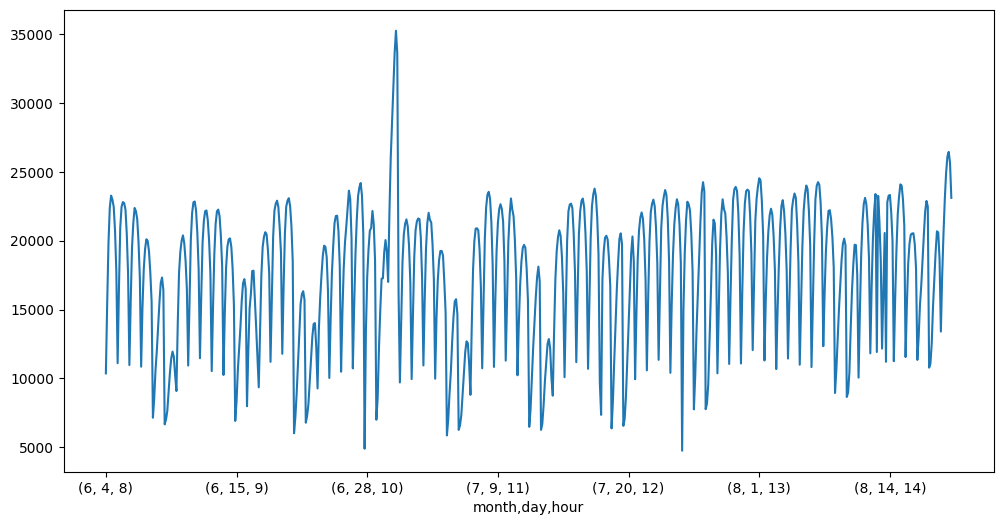

In [64]:
plt.figure(figsize=(12,6))

df.groupby(["month","day",'hour'])["usage"].sum().plot();

In [65]:
for day in range(16,31):
    for hour in range(8,17):
        if df[(df['month'] == 6) & (df['day'] == day) & (df['hour'] == hour)]['usage'].sum() > 30000 :
            print(f'{day}.day and {hour}.hour') # Anormal day and hours.

30.day and 12.hour
30.day and 13.hour
30.day and 14.hour
30.day and 15.hour


In [66]:
df[(df['month'] == 6) & (df['day'] == 30) & (df['hour'] == 12)]['usage'].sum() # 31k because there is double data.

31147

In [67]:
df[(df['month'] == 6) & (df['day'] == 30) & (df['hour'] == 13)]['usage'].sum() # 33k because there is double data.

33654

In [68]:
df[(df['month'] == 6) & (df['day'] == 30) & (df['hour'] == 14)]['usage'].sum() # 35k because there is double data.

35235

In [69]:
df[(df['month'] == 6) & (df['day'] == 30) & (df['hour'] == 15)]['usage'].sum() # 33k because there is double data.

33587

In [70]:
df[(df['month'] == 6) & (df['day'] == 20)] # 30.th june has double data for all hours.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min


In [71]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # 30.th june has double data for all hours.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
4313,2017-06-30 08:05:05,2,346,697,351,6,30,8,5
4312,2017-06-30 08:05:05,3,284,1930,1646,6,30,8,5
4311,2017-06-30 08:05:05,0,90,2813,2723,6,30,8,5
4310,2017-06-30 08:05:05,9,396,1332,936,6,30,8,5
4314,2017-06-30 08:05:05,6,666,3113,2447,6,30,8,5


In [72]:
df_0 = df[df['municipality_id'] == 0]
df_1 = df[df['municipality_id'] == 1]
df_2 = df[df['municipality_id'] == 2]
df_3 = df[df['municipality_id'] == 3]
df_4 = df[df['municipality_id'] == 4]
df_5 = df[df['municipality_id'] == 5]
df_6 = df[df['municipality_id'] == 6]
df_7 = df[df['municipality_id'] == 7]
df_8 = df[df['municipality_id'] == 8]
df_9 = df[df['municipality_id'] == 9]

# Problems I've found so far

In [74]:
# 1) Either the total_capacity of the municipality with id number 1 was entered incorrectly or the usage information of 229 data was entered incorrectly.(
# 1.Option --> Since there is not a big difference, we can assume that a few buses are rented by that municipality. 
# 2.Option --> Or we can think that the buses are counted incorrectly and it will be impossible to exceed the total capacity, and we can equal the ones that exceed the capacity to the upper limit.)


# 2) The time of 2 data was entered incorrectly (Solved correct data entered)
# 3) dtype of timestap feature was object (Solved dtype changed)
# 4) There is quite a bit of data and measurements for 7 o'clock. There is so little data, probably because the buses starts just towards those hours. (Solved +5 minutes and 10 seconds added.)


# 5) While 180 measurements were required, 170 measurements were made at 5 days. (Counting was made 1 time, not 2 times, at the 8th hour of those who were 170)
# 6) On 30 June, 340 measurements were made while it should have been 180. There are datas where 2 measurements are made at intervals of a few seconds.
# 7) We have 18 nan days to handle.
